# Grab land cover for a given parcel
*Resource: https://developers.arcgis.com/python/guide/raster-analysis-advanced-concepts/*

Say you want to grab land cover data for a specific location, but you don't want to download the entire NLCD dataset to do that. The ArcGIS Python API can help!

Here I present an example of doing just that. The steps involve:
* Prepping for the analysis: importing modules and authenticating our arcgis session
* Locating the land cover data and creating a layer from the data

### Prepping for analysis: importing and authenticating
* Import the the arcgis `GIS` module. We're going to do some geocoding so we need to create the arcgis `geocoding` module as well. Lastly, enable the Jupyter `display` object

In [1]:
#Import the GIS object.  and display modules
from arcgis import GIS
from arcgis.geocoding import geocode
from IPython.display import display, Image

* Authenticate our GIS object using our ArcGIS Pro account

In [2]:
#Create the GIS object, authenticating with your ArcGIS Pro account
gis = GIS('pro')

### Searching for the content and linking to it
What we want is 2011 NLCD data, provided as an *image service* (i.e. as a raster). You could search for the data from within ArcGIS Pro or via the [ArcGIS Online](http://www.arcgis.com) website, but we'll do it right here. 

Like any web search, it's a bit of an art knowing how best to locate the resource you want. At play are what general search keywords to include, and specific categories like `owner` or `item-type` to invoke. We do, however, want to search outside the Duke Community, we we want to include `outside_org=True`. 

I've decided to use `NLCD 2011` as a general search term, filter results for only those that `esri` provides, and limit results to image services: 

In [3]:
#Search for land cover and print the number of results
lc_results = gis.content.search("NLCD 2011, owner:esri",item_type='image',outside_org=True)
len(lc_results)

10

► This gives us 10 results, enough to show a list...

In [4]:
#Show a complete list of results
lc_results

[<Item title:"USA NLCD Tree Canopy Cover 2011 (Mature Support)" type:Imagery Layer owner:esri>,
 <Item title:"USA NLCD Land Cover 2011" type:Imagery Layer owner:esri>,
 <Item title:"USA NLCD Land Cover 2011 (Mature Support)" type:Imagery Layer owner:esri>,
 <Item title:"USA NLCD Landscape (Mature Support)" type:Imagery Layer owner:esri>,
 <Item title:"USA NLCD Impervious Surfaces 2011 (Mature Support)" type:Imagery Layer owner:esri>,
 <Item title:"USA NLCD Land Cover Change 2006-2011 (Mature Support)" type:Imagery Layer owner:esri>,
 <Item title:"USA NLCD Tree Canopy Cover 2011" type:Imagery Layer owner:esri>,
 <Item title:"USA NLCD Impervious Surface 2011" type:Imagery Layer owner:esri>,
 <Item title:"USA NLCD Impervious Surface Change 2006-2011" type:Imagery Layer owner:esri>,
 <Item title:"USA NLCD Impervious Change 2006-2011 (Mature Support)" type:Imagery Layer owner:esri>]

* The second item is the one we want. Let's store that as a variable named `lc_item`

<Item title:"USA NLCD Land Cover 2011" type:Imagery Layer owner:esri>
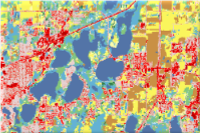

In [5]:
#Get the second result and show it's info box in our notebook
lc_item = lc_results[1]
lc_item

* Let's examine a few properties of this item. Because arcgis Item objects are dynamic (they can be vector or raster or...) the list of what properties can change. But we can get a list of properies via the `item.keys()` function:

In [6]:
#List the property keys associated with the item we fetched
lc_item.keys()

dict_keys(['id', 'owner', 'created', 'modified', 'guid', 'name', 'title', 'type', 'typeKeywords', 'description', 'tags', 'snippet', 'thumbnail', 'documentation', 'extent', 'categories', 'spatialReference', 'accessInformation', 'licenseInfo', 'culture', 'properties', 'url', 'proxyFilter', 'access', 'appCategories', 'industries', 'languages', 'largeThumbnail', 'banner', 'screenshots', 'listed', 'numComments', 'numRatings', 'avgRating', 'numViews', 'contentStatus', 'orgId', 'scoreCompleteness', 'groupDesignations', 'layers', 'tables'])

* Let's examine the services web address or its *URL*. Open this [URL](https://landscape10.arcgis.com/arcgis/rest/services/USA_NLCD_Land_Cover_2011/ImageServer) in your web browser. (Note, you'll have to authenticate as this layer is only available to ESRI license holders!) The web site include many of these properties as well...

In [7]:
#Get the URL
lc_item['url'] #we could also use lc_item.url

'https://landscape10.arcgis.com/arcgis/rest/services/USA_NLCD_Land_Cover_2011/ImageServer'

* Down the road, we may need the image's spatial reference, so let's store that as a variable.

In [8]:
#Extract the image service's spatial reference to a variable
lc_sr = lc_item.spatialReference
lc_sr

'102100'

### From *arcgis* `item` to *arcgis* `layer`

* Now we need to extract the data **layer** from the data **item**. The `layers` property returns a list of layers associated with this image service, of which there is only one. So we extract that one to a new variable called `lc_lyr`...<br>*Calling this variable displays it to our notebook!*

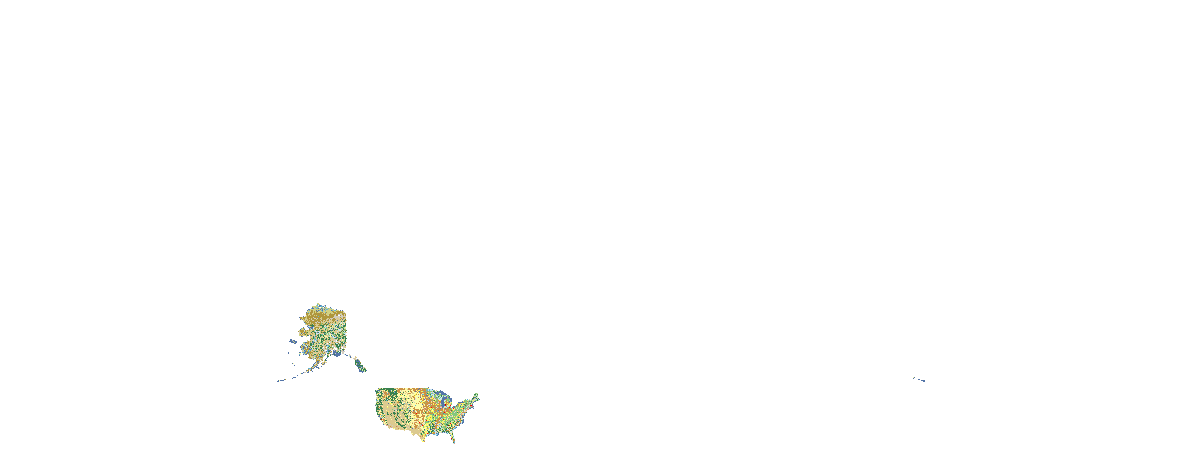

In [10]:
#Extract the one (and only) layer in the item to a new variable and display it
lc_lyr = lc_item.layers[0]
lc_lyr

## Subsetting our image


In [ ]:
#Create a map, zoomed to Durham
m = gis.map("Durham, NC")
m

In [ ]:
m.add_layer(lc_item)

In [16]:
#Create a polygon of our map's extent, in the same coordinate system as our NLCD image layer
durhamZoom  = geocode('Durham, NC',out_sr = lc_item.spatialReference)[0]
durham_extent = durhamZoom['extent']
durham_extent

{'xmin': -8794845.350698525,
 'ymin': 4285004.172677765,
 'xmax': -8770577.701705592,
 'ymax': 4314998.931767819}

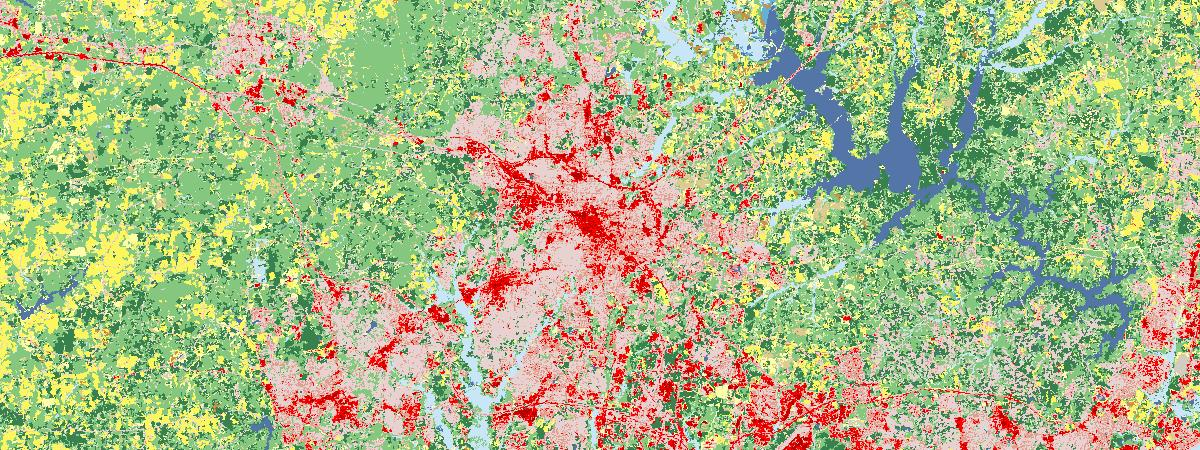

In [15]:
lc_lyr.extent =  durham_extent
lc_lyr

In [ ]:
img = lc

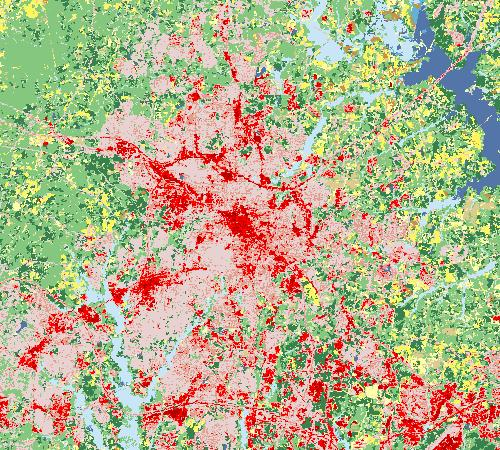

In [18]:
img = lc_lyr.export_image(bbox=durham_extent,size=[500,450],f='image')
Image(img)

# Image attributes

In [23]:
tbl = lc_lyr.attribute_table()
histo = lc_lyr.compute_histograms(durham_extent)

In [31]:
import pandas as pd
pd.DataFrame(tbl['attributes'])

KeyError: 'attributes'